# Content

##Attributes

###People

*   **ID**: Customer's unique identifier
*   **Education**: Customer's education level
*   **Age**: Customer´s age
*   **Marital_Status**: Customer's marital status
*   **Income**: Customer's yearly household income
*   **#_children_at_home**: Number of children plus teenagers in customer's household
*   **Recency**: Number of days since customer's last purchase
*   **Complain**: 1 if customer complained in the last 2 years, 0 otherwise

###Products

*   **MntWines**: Amount spent on wine in last 2 years
*   **MntFruits**: Amount spent on fruits in last 2 years
*   **MntMeatProducts**: Amount spent on meat in last 2 years
*   **MntFishProducts**: Amount spent on fish in last 2 years
*   **MntSweetProducts**: Amount spent on sweets in last 2 years


###Promotion

*   **NumDealsPurchases**: Number of purchases made with discount
*   **Promotion_#_campaign_accepted:** Number of campaign that the customer accepted the promotion  

###Place

*   **NumWebPurchases**: Number of purchases made through the company’s web site
*   **NumCatalogPurchases**: Number of purchases made using a catalogue
*   **NumStorePurchases**: Number of purchases made directly in stores
*   **NumWebVisitsMonth**: Number of visits to company’s web site in the 
*   **lifetime_so_far_days:**  Number of days that have passed since the person started to be a ccustomer

In [5]:
# from google.colab import drive
# drive.mount('/content/drive/')

/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/db
Income Response


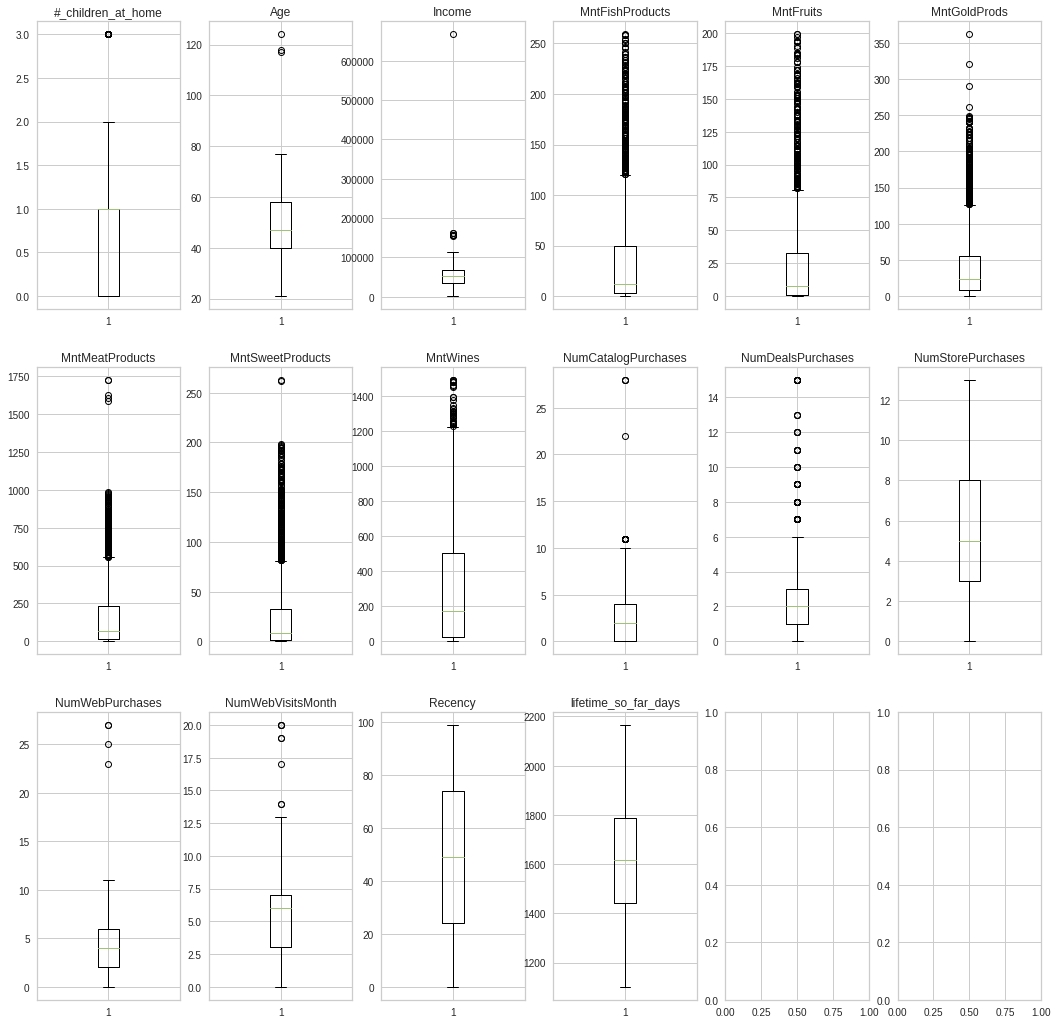

Ready


In [6]:
%run '/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/1.-Generating_a_proper_dataset.ipynb'
%run '/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/resources/Functions.ipynb'
%run '/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/resources/Load_libraries.ipynb'

In [7]:
# Checking of the size of our dataframe
print(mk.shape, mk.size)

# it has 2240 rows, and 21 columns

(2240, 21) 47040


In [8]:
# Checking basic information such as data type of each variable and if there are null values present.
mk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 1 to 2240
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   ID                             2240 non-null   string  
 1   Education                      2240 non-null   category
 2   Marital_Status                 2240 non-null   category
 3   Income                         2240 non-null   float64 
 4   Recency                        2240 non-null   int32   
 5   MntWines                       2240 non-null   float64 
 6   MntFruits                      2240 non-null   float64 
 7   MntMeatProducts                2240 non-null   float64 
 8   MntFishProducts                2240 non-null   float64 
 9   MntSweetProducts               2240 non-null   float64 
 10  MntGoldProds                   2240 non-null   float64 
 11  NumDealsPurchases              2240 non-null   int32   
 12  NumWebPurchases                224

In [9]:
# Getting basic stadistics of our dataframe:
mk.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,lifetime_so_far_days,#_children_at_home
count,"2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0"
mean,"51,977.8",49.1,303.9,26.3,166.9,37.5,27.1,44.0,2.3,4.1,2.7,5.8,5.3,48.1,"1,614.0",1.0
std,"21,409.5",29.0,336.6,39.8,225.7,54.6,41.3,52.2,1.9,2.8,2.9,3.3,2.4,11.7,232.2,0.8
min,"1,730.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,"1,102.0",0.0
25%,"35,538.8",24.0,23.8,1.0,16.0,3.0,1.0,9.0,1.0,2.0,0.0,3.0,3.0,40.0,"1,442.8",0.0
50%,"51,498.5",49.0,173.5,8.0,67.0,12.0,8.0,24.0,2.0,4.0,2.0,5.0,6.0,47.0,"1,615.0",1.0
75%,"68,275.8",74.0,504.2,33.0,232.0,50.0,33.0,56.0,3.0,6.0,4.0,8.0,7.0,58.0,"1,787.2",1.0
max,"162,397.0",99.0,"1,493.0",199.0,"1,725.0",259.0,263.0,362.0,15.0,27.0,28.0,13.0,20.0,77.0,"2,165.0",3.0


Now it is the turn of the data viz to uncover some insights in this EDA, as a guide I will use the following charts to discover more about the dataset:

* **Heatmaps**: show correlations among variables.
* **Bar chart**: normal and stacked bar chars.
* **Scattered chart**: uncover relationship among variables.
* **Pie chart**: Measuaring some interisting divisions into the dataset.
* **Boxplot**: Distributions

In [10]:
# We generate some extra variables to be able to summarize 
mk['Total_value_purchases'] = mk['MntWines']+mk['MntFruits']+mk['MntMeatProducts']+mk['MntFishProducts']+mk['MntSweetProducts']+mk['MntGoldProds']
mk['Total_num_ purchases'] = mk['NumWebPurchases']+mk['NumCatalogPurchases']+mk['NumStorePurchases']+mk['NumDealsPurchases']

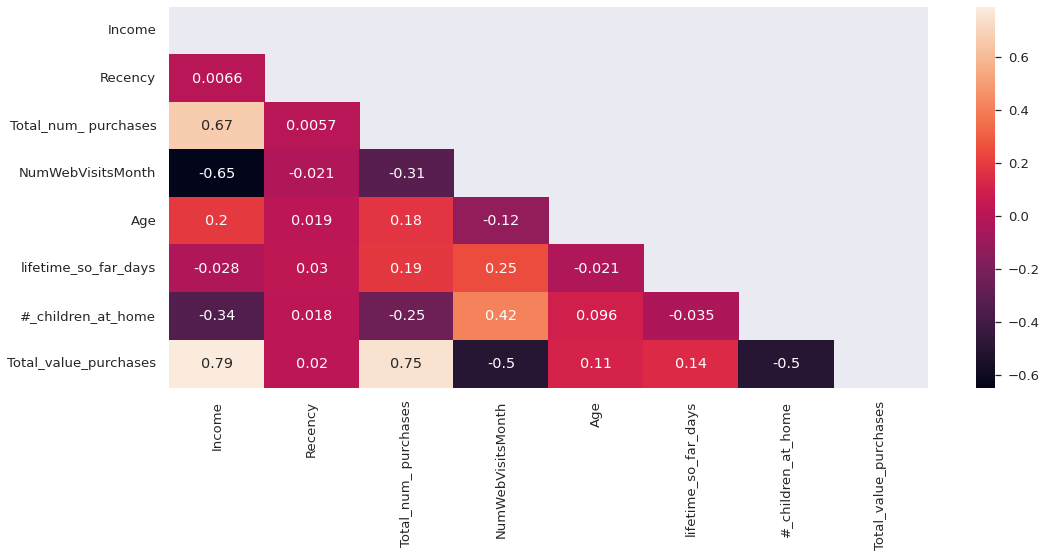

In [11]:
# Correlation matrix: heatmap
# Option 1: Summarized of variables: Total_value_purchases and Total_num_ purchases
# Here:
  # Total_value_purchases = MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds
  # Total_num_ purchases = NumWebPurchases + NumCatalogPurchases + NumStorePurchases + NumDealsPurchases

cols2 = ['Income','Recency','Total_num_ purchases','NumWebVisitsMonth','Age','lifetime_so_far_days',
        '#_children_at_home','Total_value_purchases']
cm2 = np.corrcoef(mk[cols2].values.T)
matrixd = np.triu(cm2)
sns.set(font_scale=1.2 ,rc = {'figure.figsize':(17,7)})

sns.heatmap(cm2, cbar=True, annot=True, yticklabels=cols2, xticklabels=cols2, mask=matrixd)

plt.show()

### **Quick analysis of the correlations found: 1**
Some interesting insights here:
* ***Income*** has three outstanding correlations with:
     * *Total_value_purchases* -> **++**
     * *Total_num_purchases* -> **++**
     * *NumWebVisitsMonth* -> **--**
* ***Total_value_purchases*** has four outstanding correlations:
     * *Income* -> **++**
     * *Total_num_purchases* -> **++** **Note**: the best would be to avoid to work with this one because somehow it is the cause of the 'Total_value_purchases'
     * *NumWebVisitsMonth* -> **--**
     * #*_children_at_home* -> **--**
* ***Recency*** has not direct correlation with any variable.


Now let´s breakdown the ***Total_value_purchases*** variable and keep the ***Total_num_ purchases***

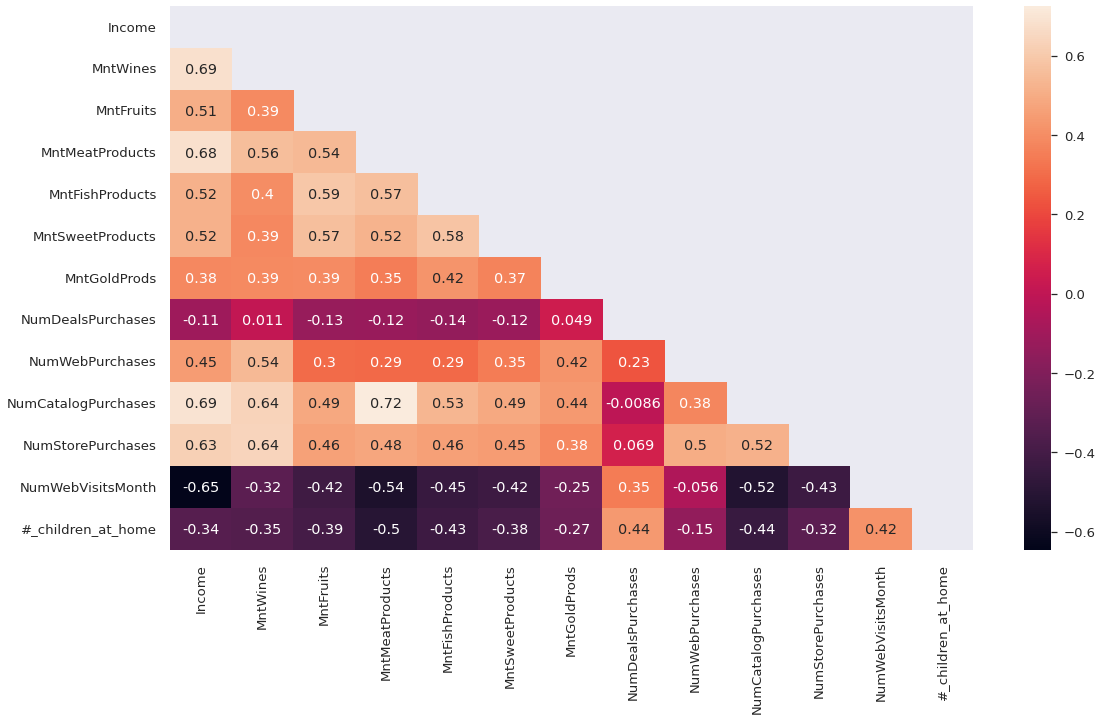

In [12]:
# Correlation matrix: heatmap
# Option 2: Breakdown of the variables: Total_num_ purchases and Total_value_ purchases
# We drop the following variables because of there is not a substancial correlation with other variables: ['Recency', 'Age', 'lifetime_so_far_days']
cols = ['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts',
        'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases',
        'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth', '#_children_at_home']
cm = np.corrcoef(mk[cols].values.T)
matrix = np.triu(cm)
sns.set(font_scale=1.2 ,rc = {'figure.figsize':(18,10)})

sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols, mask=matrix)

plt.show()

In [13]:
# Generation of correlation sorting to easy undertanding of the matrix that is above
correlation_mat = mk[cols].corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

In [14]:
# Way to know the positive significant correlations
sorted_pairs[(sorted_pairs >= 0.6) & (sorted_pairs != 1)]

NumStorePurchases    Income                0.6
Income               NumStorePurchases     0.6
NumCatalogPurchases  MntWines              0.6
MntWines             NumCatalogPurchases   0.6
                     NumStorePurchases     0.6
NumStorePurchases    MntWines              0.6
Income               MntMeatProducts       0.7
MntMeatProducts      Income                0.7
MntWines             Income                0.7
Income               MntWines              0.7
NumCatalogPurchases  Income                0.7
Income               NumCatalogPurchases   0.7
NumCatalogPurchases  MntMeatProducts       0.7
MntMeatProducts      NumCatalogPurchases   0.7
dtype: float64

In [15]:
# Way to know the negative significant correlations
sorted_pairs[sorted_pairs <= -0.5]

Income               NumWebVisitsMonth     -0.6
NumWebVisitsMonth    Income                -0.6
MntMeatProducts      NumWebVisitsMonth     -0.5
NumWebVisitsMonth    MntMeatProducts       -0.5
                     NumCatalogPurchases   -0.5
NumCatalogPurchases  NumWebVisitsMonth     -0.5
#_children_at_home   MntMeatProducts       -0.5
MntMeatProducts      #_children_at_home    -0.5
dtype: float64

### **Quick analysis of the correlations found: 2**
The following correlation that could be interesting were found:

* ***MntWines*** with:
    * ***Income*** --> 0.7
    * ***NumCatalogPurchases***--> 0.6
    * ***NumStorePurchases***--> 0.6

* ***Income*** with:
    * ***MntMeatProducts*** --> 0.7
    * ***NumCatalogPurchases*** --> 0.7
    * ***NumStorePurchases*** --> 0.6
    * ***NumWebVisitsMonth*** --> -0.6

* ***MntMeatProducts*** with:
    * ***NumCatalogPurchases*** --> 0.7
    * ***NumWebVisitsMonth*** --> -0.5
    * ***#_children_at_home*** --> -0.5

* ***NumCatalogPurchases***  <--> ***NumWebVisitsMonth*** --> -0.5


Now based on this quick analysis, we can start to generate data viz of the variable to get better insights


Let´s start with the basic ones:

In [16]:
 mk = mk.sort_values('Promotion_#_campaign_accepted')


Text(0, 0.5, ' ')

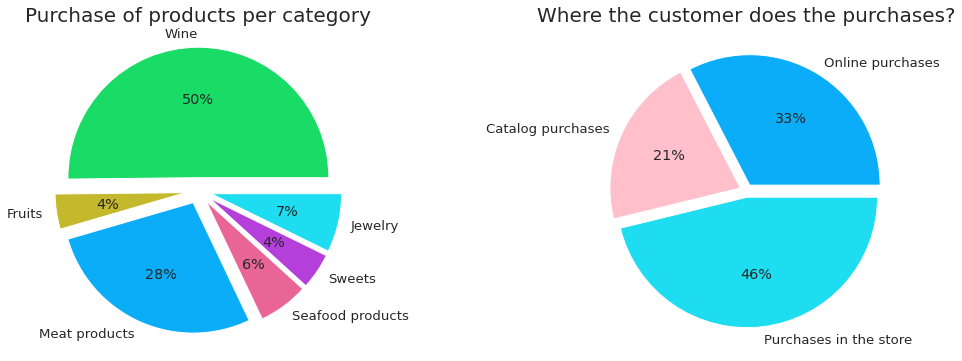

In [17]:
pie1 = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
pie2 = [ 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
# 'NumDealsPurchases',
pie1 = mk[pie1]
pie2 = mk[pie2]

a = pie1.sum()
a = pd.DataFrame(a, columns=['Variable'])
a = a.reset_index()
a = a.rename(columns= {0:'Variable','Variable':'Sum'})


b = pie2.sum()
b = pd.DataFrame(b, columns=['Variable'])
b = b.reset_index()
b = b.rename(columns= {0:'Variable','Variable':'Sum'})


fig, ax = plt.subplots(1, 2, figsize=(18,6))
ax = ax.ravel()

g1 = a.plot(kind='pie' ,y= 'Sum',autopct='%1.0f%%',explode=[0.1]*6,labels=['Wine','Fruits','Meat products','Seafood products', 'Sweets', 'Jewelry'], colors=['#19DC66','#C4B82D','#0BADF9','#E96596','#B43FDA','#1FDDF0'],
            ax = ax[0], shadow=False, legend=[])
# g1.legend(['Wine','Fruits','Meat products','Seafood products', 'Sweets', 'Jewelry'],
#         title="Categories",
#         loc="lower left",
#         bbox_to_anchor=(1, 0, 0.5, 1))
g1.set_title('Purchase of products per category', fontsize=20)
g1.set_ylabel(' ')

# 'Purchases with discount','#19DC66',
g2= b.plot(kind='pie' ,y= 'Sum',autopct='%1.0f%%',explode=[0.05]*3, labels=['Online purchases','Catalog purchases', 'Purchases in the store'], colors=['#0BADF9','pink','#1FDDF0'],
            ax = ax[1], shadow=False, legend=[])
g2.set_title('Where the customer does the purchases?', fontsize=20)
g2.set_ylabel(' ')

We start our analysis with some pie graphs to undertand the common distribution of sales among products and the different channels of the store.

Products:
* The main product that is sold at the store is Wine (around 50%)
* The second most sold product is meat (around 28%)
* Sweets are not so popular

Places:
* The favorite place to purchase is the physical store (46%)
* The second favorite place is online (33%)

In [23]:
data
# data1 = mk.groupby("#_children_at_home")['ID'].count()

Education
2n_Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: ID, dtype: int64

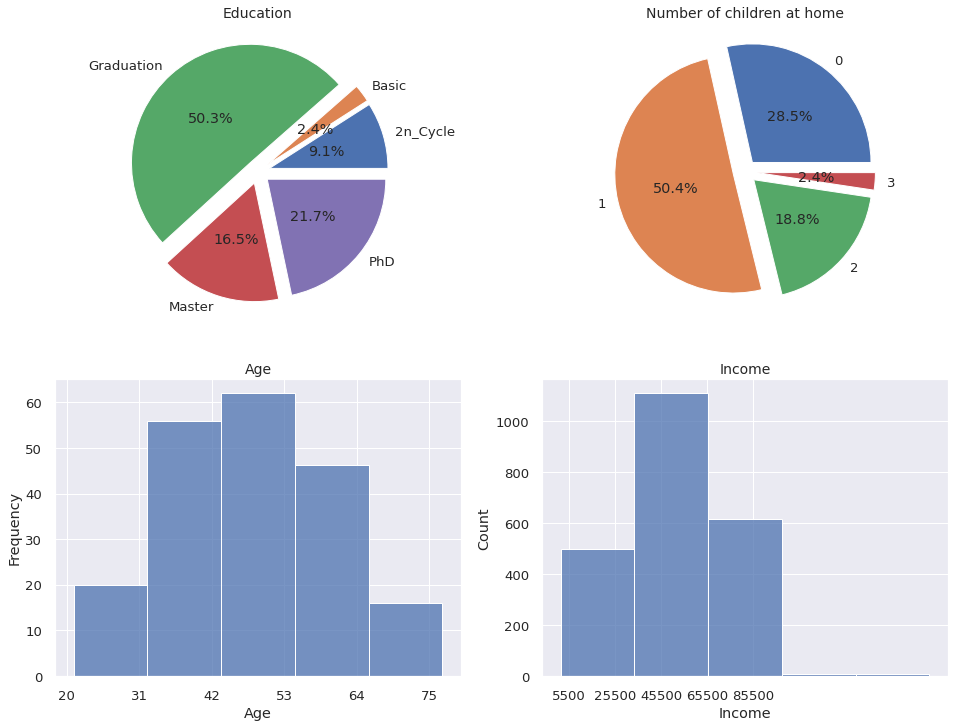

In [18]:
data = mk.groupby("Education")['ID'].count()
data1 = mk.groupby("#_children_at_home")['ID'].count()

fig, ax = plt.subplots(2,2,figsize=[16,12])
ax = ax.ravel()

labels = data.keys()
g1 = data.plot(kind='pie', autopct="%.1f%%",explode=[0.1]*5, labels=labels,  pctdistance=0.5, ax = ax[0], legend=[] )
g1.set_title("Education", fontsize=14)
g1.set_ylabel(' ')

labels = data1.keys()
g2 = data1.plot(kind='pie', autopct="%.1f%%", labels=labels,explode=[0.1]*4, pctdistance=0.5, ax = ax[1], legend=[] )
g2.set_title("Number of children at home", fontsize=14)
g2.set_ylabel(' ')

g3= sns.histplot(data=mk, x='Age',bins=5,cumulative=False,stat='frequency',ax = ax[2])
g3.set_xticks(range(20, 80, 11))
g3.set_title("Age", fontsize=14)

g3= sns.histplot(data=mk, x='Income',bins=5, cumulative=False,ax = ax[3])
g3.set_xticks(range(5500, 105500, 20000))
g3.set_title("Income", fontsize=14)

plt.show()

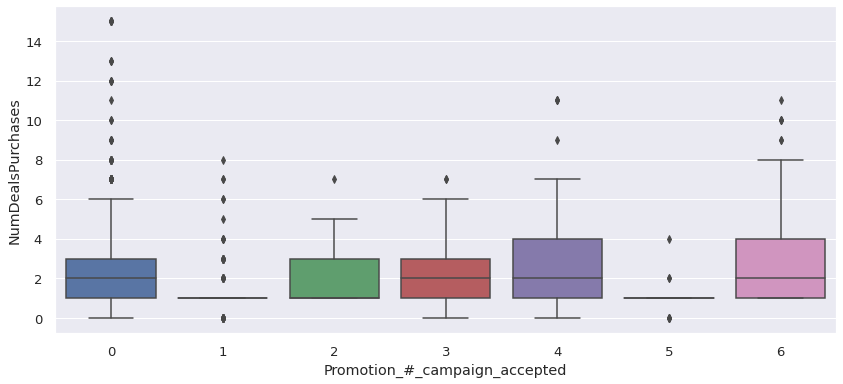

In [19]:
scatter_2 = ['NumDealsPurchases','Promotion_#_campaign_accepted']
mks = mk[scatter_2]

plt.subplots(1, 1, figsize=(14,6))
sns.boxplot(data=mks,x='Promotion_#_campaign_accepted',y='NumDealsPurchases',dodge=True)
plt.show()

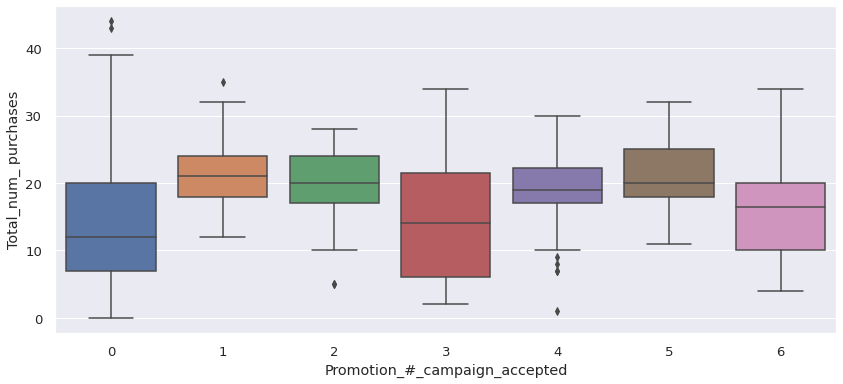

In [20]:
scatter = ['Total_num_ purchases','Promotion_#_campaign_accepted']
mks = mk[scatter]

plt.subplots(1, 1, figsize=(14,6))
sns.boxplot(data=mks,x='Promotion_#_campaign_accepted',y='Total_num_ purchases',dodge=True)
plt.show()

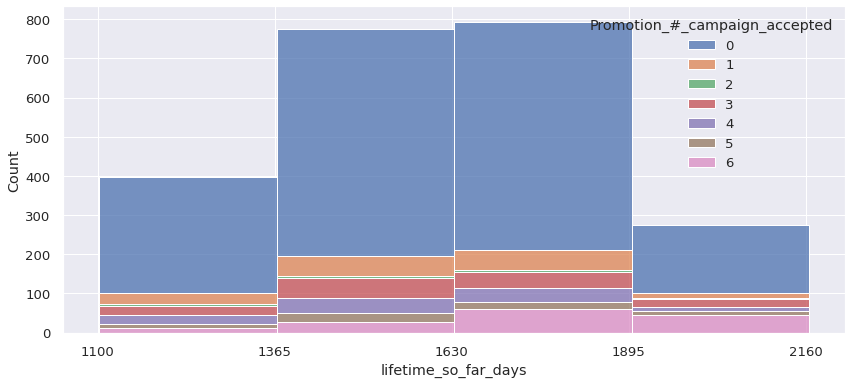

In [21]:
plt.subplots(1, 1, figsize=(14,6))
sns.histplot(data=mk, x='lifetime_so_far_days',bins=4,cumulative=False,hue='Promotion_#_campaign_accepted',multiple='stack')
plt.xticks(range(1100, 2200, 265))
plt.show()

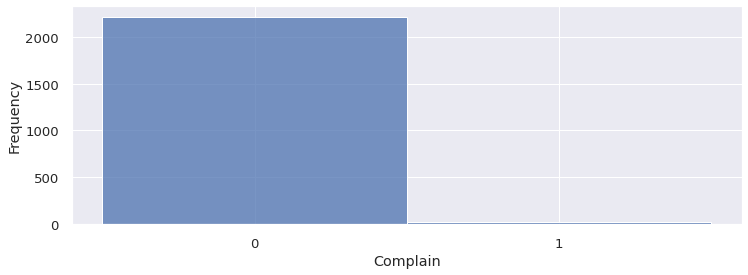

In [22]:
plt.subplots(1, 1, figsize=(12,4))
sns.histplot(data=mk, x='Complain',bins=15,cumulative=False,stat='frequency',multiple='dodge')
plt.show()